In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import pickle
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support

pd.options.display.max_columns = 400

In [2]:
data = pd.read_csv('data_cleaned_50words.csv')
data

,titles,authors,url,source,dates,category,gpt2_inputs,news,is_fake
0,2 Nigerians charged over alleged roles in tran...,Shaffiq Alkhatib,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 14, 2019",courts-crime,NaN,SINGAPORE - Two men were taken to court on Tue...,0
1,Nigerians caught in KL to face charges here ov...,Goh Yan Han,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 14, 2019",courts-crime,NaN,Two Nigerian nationals are expected to be char...,0
2,Data centre operator loses $24m suit,K.C. Vijayan,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 14, 2019",courts-crime,NaN,A data centre operator that could not maintain...,0
3,Man jailed 12½ years for sexually abusing daug...,Selina Lum,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 14, 2019",courts-crime,NaN,A Primary 2 girl who asked her father for help...,0
4,Probation for man who groped boy in church toilet,Shaffiq Alkhatib,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 14, 2019",courts-crime,NaN,A volunteer at a church student-care centre lu...,0
5,NUS student charged over latest voyeurism inci...,Shaffiq Alkhatib,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 14, 2019",courts-crime,NaN,Even with the National University of Singapore...,0
6,S'porean man and Filipino woman arrested for a...,Goh Yan Han,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 13, 2019, 11:16 pm",courts-crime,NaN,SINGAPORE - A Singaporean man and a Filipino w...,0
7,Two Nigerians to be charged for alleged involv...,Goh Yan Han,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 13, 2019, 9:47 pm",courts-crime,NaN,SINGAPORE - Two Nigerian nationals are expecte...,0
8,"Sales supervisor, 53, jailed 12.5 years for se...",Selina Lum,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 13, 2019, 8:46 pm",courts-crime,NaN,SINGAPORE - A Primary 2 girl approached her fa...,0
9,Probation for volunteer who committed indecent...,Shaffiq Alkhatib,https://www.straitstimes.com/singapore/courts-...,The Straits Times,"May 13, 2019, 12:55 pm",courts-crime,NaN,SINGAPORE - A volunteer at a church student ca...,0


# Imputing Missing Topics for TODAYOnline News Based on Straits Times Labels

**Classification Model Selection**

In [3]:
data['category'].value_counts()

companies-markets    3228
courts-crime         1962
transport             938
politics              868
health                582
economy               546
education             496
property              362
banking               348
environment           240
manpower              146
housing               100
invest                 62
Name: category, dtype: int64

In [4]:
# Group these categories to be under Business

data['category'] = ['business' if i in ['companies-markets', 'economy', 'banking', 'property', 'invest'] \
                    else i for i in data['category']]

In [5]:
data['category'].value_counts()

business        4546
courts-crime    1962
transport        938
politics         868
health           582
education        496
environment      240
manpower         146
housing          100
Name: category, dtype: int64

In [6]:
data['category'].isna().sum()

5588

In [7]:
data_st = data[data['source'] == 'The Straits Times']
data_st['category'].isna().sum()

0

In [8]:
Xcat = data_st['news']
ycat = data_st['category']

print(Xcat.shape)
print(ycat.shape)

(9878,)
(9878,)


**Models have been trained and saved as pickle**

In [9]:
# Xcat_train, Xcat_test, ycat_train, ycat_test = train_test_split(Xcat, ycat, test_size=0.33, 
#                                                                 random_state=42, stratify = ycat)

In [10]:
# def fit_score_print_cat(model_name, model, X_train = Xcat_train, y_train = ycat_train, X_test = Xcat_test, 
#                         y_test = ycat_test, n_jobs = -1):

#     model.fit(X_train, y_train)
#     model_name['predict'] = model.predict(X_test)
#     model_name['clf_report'] = classification_report(y_test, model_name['predict'])

In [11]:
# logr_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                       ('tf', TfidfTransformer()), 
#                       ('logr', LogisticRegression(penalty = 'l2', random_state = 42))])

# # scores = cross_val_score(logr_tf, Xcat, ycat, verbose = 1, cv = 10, n_jobs= -1)
# # print(np.mean(scores))

# dict_logr_tf = {}
# fit_score_print_cat(model_name= dict_logr_tf, model= logr_tf)

In [12]:
# logr_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)),
#                       ('logr', LogisticRegression(penalty = 'l2', random_state = 42))])

# dict_logr_cvec = {}
# fit_score_print_cat(model_name= dict_logr_cvec, model= logr_cvec)

In [13]:
# nb_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                     ('tf', TfidfTransformer()), 
#                     ('nb', MultinomialNB())])

# dict_nb_tf = {}
# fit_score_print_cat(model_name= dict_nb_tf, model= nb_tf)

In [14]:
# nb_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                     ('nb', MultinomialNB())])

# dict_nb_cvec = {}
# fit_score_print_cat(model_name= dict_nb_cvec, model= nb_cvec)

In [15]:
# svm_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                       ('tf', TfidfTransformer()), 
#                       ('svm', SVC(kernel = 'linear', probability= True, random_state = 42))])

# dict_svm_tf = {}
# fit_score_print_cat(model_name= dict_svm_tf, model= svm_tf)

In [16]:
# svm_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)),
#                       ('svm', SVC(kernel= 'linear', probability= True, random_state = 42))])

# dict_svm_cvec = {}
# fit_score_print_cat(model_name= dict_svm_cvec, model= svm_cvec)

In [17]:
# rf_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                       ('tf', TfidfTransformer()), 
#                       ('rf', RandomForestClassifier(n_estimators = 800, criterion = 'entropy', 
#                                                     max_depth = None, random_state = 42))])

# dict_rf_tf = {}
# fit_score_print_cat(model_name= dict_rf_tf, model= rf_tf)

In [18]:
# rf_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)),
#                       ('rf', RandomForestClassifier(n_estimators = 800, criterion = 'entropy', max_depth = None))])

# dict_rf_cvec = {}
# fit_score_print_cat(model_name= dict_rf_cvec, model= rf_cvec)

In [19]:
# xgb_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                       ('tf', TfidfTransformer()), 
#                       ('xgb', XGBClassifier(max_depth= 1, learning_rate= 0.5, n_estimators= 1000, 
#                                             early_stopping_rounds = 5, random_state= 42))])

# dict_xgb_tf = {}
# fit_score_print_cat(model_name= dict_xgb_tf, model= xgb_tf)

In [20]:
# xgb_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)),
#                       ('xgb', XGBClassifier(max_depth= 1, learning_rate= 0.5, n_estimators= 1000, 
#                                             early_stopping_rounds = 5, random_state= 42))])

# dict_xgb_cvec = {}
# fit_score_print_cat(model_name= dict_xgb_cvec, model= xgb_cvec)

In [21]:
# # Save models and results with pickle

# with open("topics_ml_models.pckl", "wb") as f:
#     for model in [logr_tf, logr_cvec, nb_tf, nb_cvec, svm_tf, svm_cvec, rf_tf, rf_cvec, xgb_tf, xgb_cvec]:
#          pickle.dump(model, f)

# with open("topics_ml_models_results.pckl", "wb") as f:
#     for dictionary in [dict_logr_tf, dict_logr_cvec, dict_nb_tf, dict_nb_cvec, dict_svm_tf, dict_svm_cvec, dict_rf_tf, 
#                       dict_rf_cvec, dict_xgb_tf, dict_xgb_cvec]:
#          pickle.dump(dictionary, f)

In [22]:
## Load models and results with pickle

topics_models = []
with open("topics_ml_models.pckl", "rb") as f:
    while True:
        try:
            topics_models.append(pickle.load(f))
        except EOFError:
            break

topics_models_results = []
with open("topics_ml_models_results.pckl", "rb") as f:
    while True:
        try:
            topics_models_results.append(pickle.load(f))
        except EOFError:
            break

/home/lowkahhou/.local/lib/python3.5/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.0 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/lowkahhou/.local/lib/python3.5/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.21.0 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/lowkahhou/.local/lib/python3.5/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.0 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/lowkahhou/.local/lib/python3.5/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator Pipeline from version 0.21.0 when using version 0.21.1. This might lead to breaki

In [23]:
models_list = ["LogR_tfidf", "LogR_cvec", "NBayes_tfidf", "NBayes_cvec", 
               "LinearSVM_tfidf", "LinearSVM_cvec", "RForest_tfidf", "RForest_cvec", "XGBoost_tfidf", "XGBoost_cvec"]

for index, model in enumerate(topics_models_results):
    print(models_list[index])
    print(model['clf_report'])

LogR_tfidf
              precision    recall  f1-score   support

    business       0.89      0.98      0.94      1500
courts-crime       0.92      0.95      0.94       648
   education       0.89      0.81      0.85       164
 environment       0.94      0.58      0.72        79
      health       0.85      0.85      0.85       192
     housing       0.88      0.45      0.60        33
    manpower       0.79      0.31      0.45        48
    politics       0.88      0.68      0.77       286
   transport       0.85      0.80      0.82       310

    accuracy                           0.89      3260
   macro avg       0.88      0.71      0.77      3260
weighted avg       0.89      0.89      0.88      3260

LogR_cvec
              precision    recall  f1-score   support

    business       0.95      0.97      0.96      1500
courts-crime       0.96      0.95      0.95       648
   education       0.88      0.87      0.88       164
 environment       0.93      0.87      0.90        79
   

**Logistic Regression with CountVectorizer is preferred, to fit Straits Times Labels and predict the missing categories for TodayOnline**

In [24]:
Xcat = data_st['news']
ycat = data_st['category']

TodayNews_real = data[(data['source'] == 'TodayOnline') & (data['is_fake'] == 0)]['news']
len(TodayNews_real)

2794

In [25]:
topics_models[1].fit(Xcat, ycat)
TodayNews_Topics = topics_models[1].predict(TodayNews_real)
len(TodayNews_Topics)

/home/lowkahhou/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lowkahhou/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


2794

In [26]:
TodayNews_real_index = list(data[(data['category'].isna()) & (data['is_fake'] == 0)].index)
TodayNews_fake_index = list(data[(data['category'].isna()) & (data['is_fake'] == 1)].index)

In [27]:
for count, index in enumerate(TodayNews_real_index):
    data.loc[index, 'category'] = TodayNews_Topics[count]

for count, index in enumerate(TodayNews_fake_index):
    data.loc[index, 'category'] = TodayNews_Topics[count]

In [28]:
data.to_csv('data_cleaned_50words_fulltopics.csv', encoding='utf-8-sig')

# EDA

In [29]:
data['is_fake'].value_counts()

1    7733
0    7733
Name: is_fake, dtype: int64

In [30]:
cat_plot = data.groupby(['category','is_fake']).size().reset_index(drop= False)
cat_plot.rename(columns= {0: 'count'}, inplace = True)
cat_plot.sort_values('count', ascending= False, inplace= True)

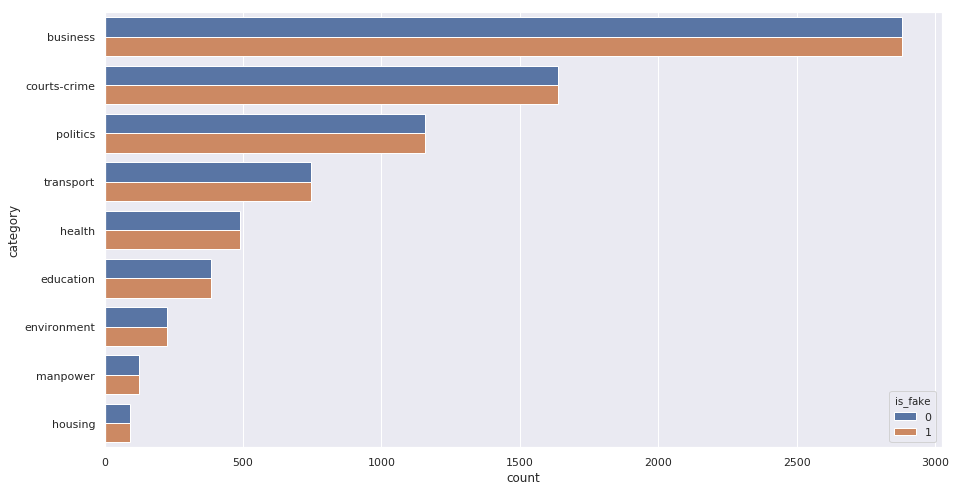

In [31]:
plt.figure(figsize= (15,8))
sns.set(font_scale=1) 
sns.barplot(x= 'count', y = 'category', data = cat_plot, hue= 'is_fake')
plt.show()

# Models Comparison

In [32]:
X = data['news']
y = data['is_fake']

print(X.shape)
print(y.shape)

(15466,)
(15466,)


In [33]:
# Manually split to train and test dataset with same proportion of real/fake news and news category

test_index = []

for i in data['is_fake'].unique():
    for j in data['category'].unique():
        indexes = list(data[(data['is_fake'] == i) & (data['category'] == j)].index)
        random.seed(42)
        test_index += random.sample(indexes, int(len(indexes)/3))

train_index = [i for i in data.index if i not in test_index]

data.loc[test_index, :]['category'].value_counts()

business        1918
courts-crime    1090
politics         772
transport        496
health           324
education        256
environment      148
manpower          84
housing           62
Name: category, dtype: int64

In [34]:
len(X[train_index])

10316

In [35]:
len(X[test_index])

5150

In [36]:
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10316,) (10316,)
(5150,) (5150,)


In [37]:
class ToDenseTransformer(BaseEstimator,TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit(self, X, y=None, **fit_params):
        return self

def fit_score_print(model_name, model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, n_jobs = -1):

    model_name['train_scores'] = cross_val_score(model, X_train, y_train, verbose = 1, cv = 10, n_jobs= n_jobs)
    model_name['train_score_mean'] = np.mean(model_name['train_scores'])
    model_name['train_score_sd'] = np.std(model_name['train_scores'])
    model.fit(X_train, y_train)
    model_name['predict'] = model.predict(X_test)
    model_name['accuracy_score'] = accuracy_score(y_test, model_name['predict'])
    model_name['precision_recall_f1_suppport'] = precision_recall_fscore_support(y_test, model_name['predict'])
    
    try:
        model_name['predict_proba'] = model.predict_proba(X_test)
        model_name['auc_score'] = roc_auc_score(y_test, model_name['predict_proba'][:,1])
    
    except:
        model_name['predict_proba'] = np.nan
        model_name['auc_score'] = np.nan
    
    bold = "\033[1m"
    reset = "\033[0;0m"

    for key in ['train_scores', 'train_score_sd', 'train_score_mean', 'accuracy_score', 'auc_score']:
        print(bold + key + reset, '\n',  + model_name[key], '\n')

**Models have been trained and saved as pickle**

In [38]:
# logr_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                       ('tf', TfidfTransformer()), 
#                       ('logr', LogisticRegression(penalty = 'l2', random_state = 42))])

# LogisticRegression_tfidf = {}
# fit_score_print(model_name= LogisticRegression_tfidf, model= logr_tf)

In [39]:
# logr_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)),
#                       ('logr', LogisticRegression(penalty = 'l2', random_state = 42))])

# LogisticRegression_cvec = {}
# fit_score_print(model_name= LogisticRegression_cvec, model= logr_cvec)

In [40]:
# nb_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                     ('tf', TfidfTransformer()), 
#                     ('nb', MultinomialNB())])

# NaiveBayes_tfidf = {}
# fit_score_print(model_name= NaiveBayes_tfidf, model= nb_tf)

In [41]:
# nb_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                     ('nb', MultinomialNB())])

# NaiveBayes_cvec = {}
# fit_score_print(model_name= NaiveBayes_cvec, model= nb_cvec)

In [42]:
# svm_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                       ('tf', TfidfTransformer()), 
#                       ('svm', SVC(kernel = 'linear', probability= True, random_state = 42))])

# LinearSVM_tfidf = {}
# fit_score_print(model_name= LinearSVM_tfidf, model= svm_tf)

In [43]:
# svm_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)),
#                       ('svm', SVC(kernel= 'linear', probability= True, random_state = 42))])

# LinearSVM_cvec = {}
# fit_score_print(model_name= LinearSVM_cvec, model= svm_cvec)

In [44]:
# rf_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                       ('tf', TfidfTransformer()), 
#                       ('rf', RandomForestClassifier(n_estimators = 800, criterion = 'entropy', 
#                                                     max_depth = None, random_state = 42))])

# RandomForest_tfidf = {}
# fit_score_print(model_name= RandomForest_tfidf, model= rf_tf)

In [45]:
# rf_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)),
#                       ('rf', RandomForestClassifier(n_estimators = 800, criterion = 'entropy', max_depth = None))])

# RandomForest_cvec = {}
# fit_score_print(model_name= RandomForest_cvec, model= rf_cvec)

In [46]:
# xgb_tf = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
#                       ('tf', TfidfTransformer()), 
#                       ('xgb', XGBClassifier(max_depth= 1, learning_rate= 0.5, n_estimators= 1000, 
#                                             early_stopping_rounds = 5, random_state= 42))])

# XGBoost_tfidf = {}
# fit_score_print(model_name= XGBoost_tfidf, model= xgb_tf)

In [47]:
# xgb_cvec = Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
#                                                lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)),
#                       ('xgb', XGBClassifier(max_depth= 1, learning_rate= 0.5, n_estimators= 1000, 
#                                             early_stopping_rounds = 5, random_state= 42))])

# XGBoost_cvec = {}
# fit_score_print(model_name= XGBoost_cvec, model= xgb_cvec)

In [48]:
# # Save models and results with pickle

# with open("ml_models.pckl", "wb") as f:
#     for model in [logr_tf, logr_cvec, nb_tf, nb_cvec, svm_tf, svm_cvec, rf_tf, rf_cvec, xgb_tf, xgb_cvec]:
#          pickle.dump(model, f)

# with open("ml_models_results.pckl", "wb") as f:
#     for dictionary in [LogisticRegression_tfidf, LogisticRegression_cvec, NaiveBayes_tfidf, NaiveBayes_cvec, 
#                        LinearSVM_tfidf, LinearSVM_cvec, RandomForest_tfidf, RandomForest_cvec, XGBoost_tfidf, XGBoost_cvec]:
#          pickle.dump(dictionary, f)

In [49]:
## Load models and results with pickle

models = []
with open("ml_models.pckl", "rb") as f:
    while True:
        try:
            models.append(pickle.load(f))
        except EOFError:
            break

models_results = []
with open("ml_models_results.pckl", "rb") as f:
    while True:
        try:
            models_results.append(pickle.load(f))
        except EOFError:
            break

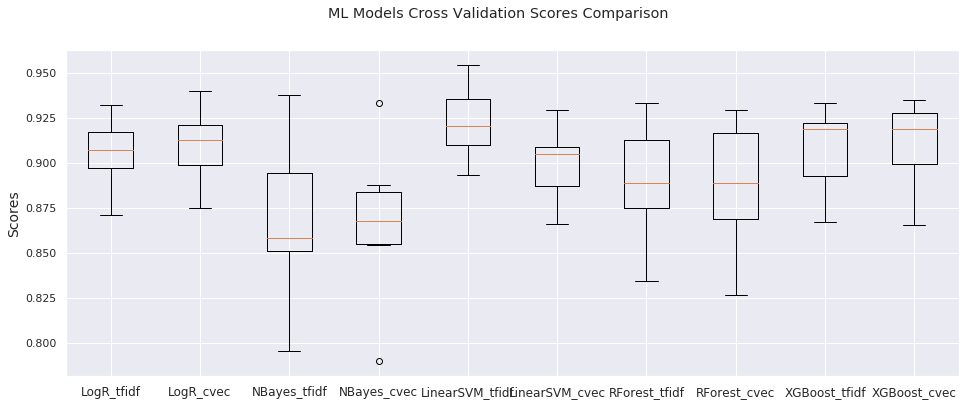

In [50]:
cross_val_scores = []
for model in models_results:
    cross_val_scores.append(model['train_scores'])

models_list = ["LogR_tfidf", "LogR_cvec", "NBayes_tfidf", "NBayes_cvec", 
               "LinearSVM_tfidf", "LinearSVM_cvec", "RForest_tfidf", "RForest_cvec", "XGBoost_tfidf", "XGBoost_cvec"]

fig = plt.figure(figsize=(16,6))
fig.suptitle('ML Models Cross Validation Scores Comparison')

ax = fig.add_subplot(111)
# plt.scatter(x = models_list, y = test_scores)
plt.boxplot(cross_val_scores)
ax.set_xticklabels(models_list, fontsize = 12)

plt.ylabel('Scores', fontsize= 14)

plt.show()

In [51]:
for index, model in enumerate(models_results):
    print(models_list[index])
    print('train score', model['train_score_mean'])
    print('accuracy test score', model['accuracy_score'])
    print('roc_auc test score', model['auc_score'])
    print('')

LogR_tfidf
train score 0.9056816813426657
accuracy test score 0.92
roc_auc test score 0.975411669337355

LogR_cvec
train score 0.9102397079852487
accuracy test score 0.9306796116504854
roc_auc test score 0.9809678574794986

NBayes_tfidf
train score 0.8644718521863476
accuracy test score 0.876116504854369
roc_auc test score 0.9451047224055047

NBayes_cvec
train score 0.8674870173854143
accuracy test score 0.8840776699029126
roc_auc test score 0.9424699029126213

LinearSVM_tfidf
train score 0.9223545570858734
accuracy test score 0.9442718446601942
roc_auc test score 0.9861562824017344

LinearSVM_cvec
train score 0.9000619026115751
accuracy test score 0.9192233009708738
roc_auc test score 0.9753576020360073

RForest_tfidf
train score 0.8886232783924136
accuracy test score 0.914368932038835
roc_auc test score 0.9747101517579413

RForest_cvec
train score 0.8894983818770225
accuracy test score 0.9234951456310679
roc_auc test score 0.9712484871335659

XGBoost_tfidf
train score 0.9068487995785

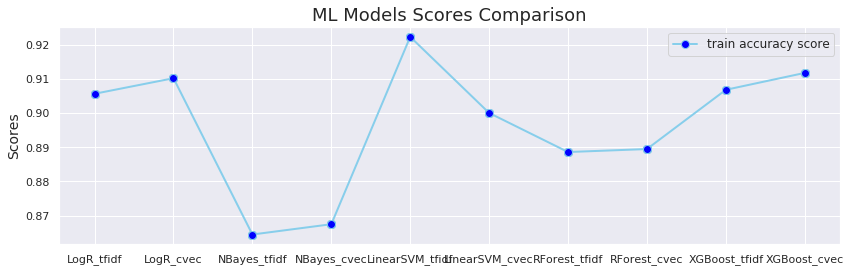

In [53]:
models_results_df = pd.DataFrame()
for index, model in enumerate(models_results):
    temp_df = pd.DataFrame(model['train_scores'], columns=['train_scores'])
    temp_df['model_name'] = models_list[index]
    temp_df['train_score_mean'] = model['train_score_mean']
    temp_df['accuracy_score'] = model['accuracy_score']
    temp_df['auc_score'] = model['auc_score']
    models_results_df = pd.concat([models_results_df, temp_df], axis= 0)

fig = plt.figure(figsize=(14,4))

plt.plot('model_name', 'train_score_mean', data= models_results_df, marker='o', markerfacecolor='blue', 
         markersize=8, color='skyblue', linewidth=2, label = 'train accuracy score')
# plt.plot('model_name', 'accuracy_score', data= models_results_df, marker= 'o', color='olive', 
#          linewidth=2, label = 'test accuracy score')
# plt.plot('model_name', 'auc_score', data= models_results_df, marker='o', color='orange', linewidth=2, 
#          label="test roc_auc score")

plt.title('ML Models Scores Comparison', fontsize = 18)

plt.ylabel('Scores', fontsize= 14)

plt.legend(fontsize = 12)

plt.show()

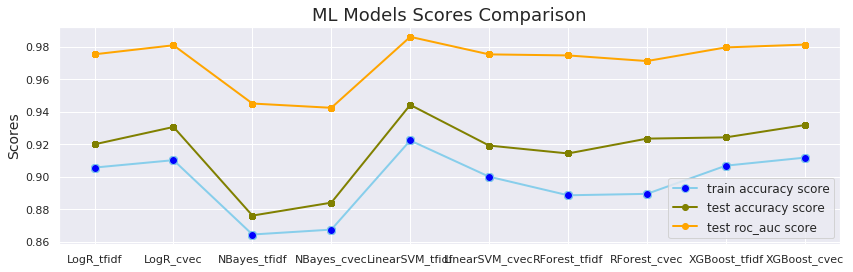

In [52]:
models_results_df = pd.DataFrame()
for index, model in enumerate(models_results):
    temp_df = pd.DataFrame(model['train_scores'], columns=['train_scores'])
    temp_df['model_name'] = models_list[index]
    temp_df['train_score_mean'] = model['train_score_mean']
    temp_df['accuracy_score'] = model['accuracy_score']
    temp_df['auc_score'] = model['auc_score']
    models_results_df = pd.concat([models_results_df, temp_df], axis= 0)

fig = plt.figure(figsize=(14,4))

plt.plot('model_name', 'train_score_mean', data= models_results_df, marker='o', markerfacecolor='blue', 
         markersize=8, color='skyblue', linewidth=2, label = 'train accuracy score')
plt.plot('model_name', 'accuracy_score', data= models_results_df, marker= 'o', color='olive', 
         linewidth=2, label = 'test accuracy score')
plt.plot('model_name', 'auc_score', data= models_results_df, marker='o', color='orange', linewidth=2, 
         label="test roc_auc score")

plt.title('ML Models Scores Comparison', fontsize = 18)

plt.ylabel('Scores', fontsize= 14)

plt.legend(fontsize = 12)

plt.show()

**CountVectorizer - Linear SVM Model has the best train score.**

**Test score and ROC_AUC score above 90%**

**But is it really that good in reality?**

**To look at feature importance**

In [53]:
feature_importance = pd.DataFrame(models[4].named_steps.cvec.get_feature_names(), columns= ['features'])
feature_importance['coef'] = np.round(models[4].named_steps.svm.coef_.todense().reshape(-1,1), 2)
feature_importance['is_fake_odds_ratio'] = np.round(np.exp(models[1].named_steps.logr.coef_[0]), 2)
feature_importance['is_real_odds_ratio'] = np.round(1/np.exp(models[1].named_steps.logr.coef_[0]), 2)
feature_importance.sort_values('coef', ascending= False)[:50]

,features,coef,is_fake_odds_ratio,is_real_odds_ratio
1895,advertisement,4.29,3.83,0.26
21941,says,3.41,1.90,0.53
19918,read,3.39,3.27,0.31
19207,program,2.82,2.31,0.43
10664,government,2.72,1.53,0.65
6461,country,2.69,2.24,0.45
18163,percent,2.65,2.42,0.41
7312,department,2.28,2.07,0.48
12127,including,2.26,1.62,0.62
17013,number,1.99,1.48,0.68


In [54]:
feature_importance.sort_values('coef', ascending= True)[:50]

,features,coef,is_fake_odds_ratio,is_real_odds_ratio
1751,added,-5.80,0.35,2.86
16927,noted,-3.94,0.35,2.83
632,2018,-3.73,0.44,2.29
648,2019,-3.62,0.37,2.69
3661,bloomberg,-3.37,0.25,3.96
12776,investigations,-3.01,0.35,2.87
27690,year,-2.62,0.74,1.35
4508,cent,-2.62,0.77,1.30
19208,programme,-2.53,0.48,2.09
19161,prof,-2.49,0.51,1.95


In [55]:
sentence = "North korea is testing out missiles on americans living overseas."

models[4].predict_proba([sentence])[:,1]

array([0.76226169])

In [56]:
sentence = "The chemicals in the water is turning the freaking frogs gay."

models[4].predict_proba([sentence])[:,1]

array([0.52180388])

In [57]:
sentence = "Lee Hsien Loong is the greatest Prime Minister of all time period."

models[4].predict_proba([sentence])[:,1]

array([0.99998518])

In [58]:
sentence = "added noted 2018 2019 bloomberg investigations year"

models[4].predict_proba([sentence])[:,1]

array([1.0000001e-07])

In [59]:
sentence = "advertisment says read program government country percent"

models[4].predict_proba([sentence])[:,1]

array([1.])

In [60]:
sentence = "In 2017, Lee Hsien Loong said he would be stepping down as Prime Minister as he wanted to focus his time \
            to be the best Pokemon Master, like no one ever was."

models[4].predict_proba([sentence])[:,1]

array([0.96250626])

In [61]:
sentence = "In 2018, Lee Hsien Loong added that he would be stepping down as Prime Minister as he wanted to focus his time \
            to be the best Pokemon Master, like no one ever was."

models[4].predict_proba([sentence])[:,1]

array([0.0173257])

# Visualisation on Class Prediction Error

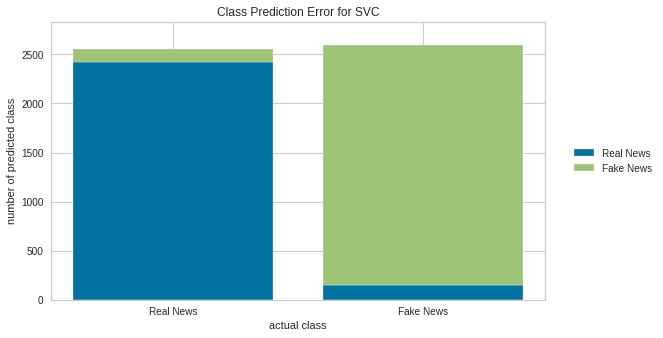

In [62]:
from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(\
    Pipeline([('cvec', CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', 
                                       lowercase= True, ngram_range= (1,2), min_df = 0.001, max_df = 0.8)), 
              ('tf', TfidfTransformer()), 
              ('svm', SVC(kernel = 'linear', probability= True, random_state = 42))]),
             classes= ["Real News", "Fake News"], size = (800, 350))
              
              
#               ('logr', LogisticRegression(penalty = 'l2', random_state = 42))]), 
#                                   classes= ["Real News", "Fake News"], size = (800, 350)    


# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
                               
# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
g = visualizer.poof()

# Visualise Misclass Category

In [63]:
index_test = list(X_test.index)
test_df = data.loc[index_test, :]
test_df['predict'] = list(models_results[4]['predict'])

In [64]:
predict_correct = []
for index in list(test_df.index):
    if test_df.loc[index, 'is_fake'] == test_df.loc[index, 'predict']:
        predict_correct.append(1)
    else:
        predict_correct.append(0)

test_df['predict_correct'] = predict_correct
test_df['predict_wrong'] = [1 if i == 0 else 0 for i in test_df['predict_correct']]

In [65]:
category_misclass = test_df.groupby(['category']).sum().reset_index()[['category', 'predict_correct', 'predict_wrong']]
category_misclass['total_count'] = category_misclass['predict_correct'] + category_misclass['predict_wrong']
category_misclass['predict_correct'] = category_misclass['predict_correct'] / category_misclass['total_count']
category_misclass['predict_wrong'] = category_misclass['predict_wrong'] / category_misclass['total_count']

In [66]:
category_misclass.head()

,category,predict_correct,predict_wrong,total_count
0,business,0.931700,0.068300,1918
1,courts-crime,0.955963,0.044037,1090
2,education,0.933594,0.066406,256
3,environment,0.979730,0.020270,148
4,health,0.956790,0.043210,324


In [67]:
category_misclass = category_misclass[['category', 'predict_correct', 'predict_wrong']]

<Figure size 1080x720 with 0 Axes>

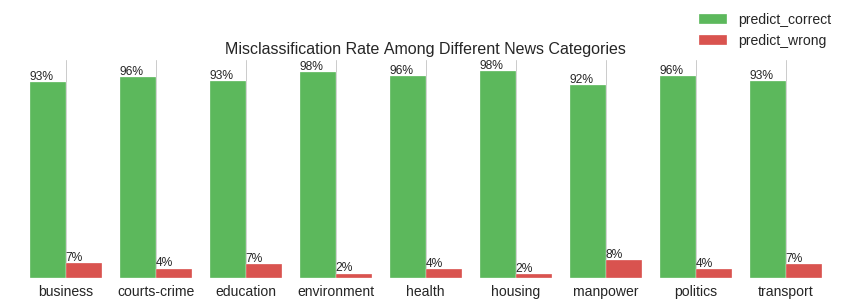

In [68]:
colors_list = ['#5cb85c','#d9534f']

plt.figure(figsize= (15,10))

# Change this line to plot percentages instead of absolute values
ax = category_misclass.plot(kind='bar',figsize=(15,4), width = 0.8, color = colors_list, edgecolor=None)

plt.legend(labels= ['predict_correct', 'predict_wrong'], fontsize= 14, bbox_to_anchor=(1,1), loc="lower right")
plt.title("Misclassification Rate Among Different News Categories", fontsize= 16)

plt.xticks(np.arange(len(category_misclass['category'])), category_misclass['category'], fontsize=14, 
           rotation='horizontal')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
plt.show()

# Visualisation with Scattertext (too long to load)

In [69]:
# import scattertext as st
# import spacy
# from pprint import pprint

In [70]:
# data['is_fake_news'] = ['Fake' if i == 1 else 'Real' for i in data['is_fake']]

In [71]:
# nlp = spacy.load("en_core_web_sm")
# corpus = st.CorpusFromPandas(data, category_col='is_fake_news', text_col='news', nlp=nlp).build()

In [72]:
# # Save processed corpus with pickle

# with open("corpus.pckl", "wb") as f:
#     pickle.dump(corpus, f)

In [73]:
# ## Load corpus with pickle

# with open("corpus.pckl", "rb") as f:
#     corpus = pickle.load(f)

In [74]:
#  print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

In [75]:
# term_freq_df = corpus.get_term_freq_df()
# term_freq_df['fake_news'] = corpus.get_scaled_f_scores('Fake')
# pprint(list(term_freq_df.sort_values(by='fake_news', ascending=False).index[:10]))

In [76]:
# term_freq_df['real_news'] = corpus.get_scaled_f_scores('Real')
# pprint(list(term_freq_df.sort_values(by='real_news', ascending=False).index[:10]))

In [77]:
# html = st.produce_scattertext_explorer(corpus, category='Real', category_name='Real News', 
#                                        not_category_name='Fake News', width_in_pixels=1000)
# open("Fake News Text Visualisation.html", 'wb').write(html.encode('utf-8'))

# Word2Vec + SVM Classifier (ignore)

In [78]:
# import gensim
# import nltk
# from nltk.corpus import stopwords
# from gensim.models import Word2Vec

In [79]:
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [80]:
# # Number of words

# X.apply(lambda x: len(x.split(' '))).sum()

In [81]:
# wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

In [82]:
# # Save word2vec model with pickle

# with open("word2vec.pckl", "wb") as f:
#     pickle.dump(wv, f)

In [83]:
# ## Load models and results with pickle

# with open("word2vec.pckl", "rb") as f:
#     wv = pickle.load(f) 

In [84]:
# wv.init_sims(replace=True)

In [85]:
# from itertools import islice
# list(islice(wv.vocab, 13030, 13050))

In [86]:
# def word_averaging(wv, words):
#     all_words, mean = set(), []
    
#     for word in words:
#         if isinstance(word, np.ndarray):
#             mean.append(word)
#         elif word in wv.vocab:
#             mean.append(wv.syn0norm[wv.vocab[word].index])
#             all_words.add(wv.vocab[word].index)

#     if not mean:
#         logging.warning("cannot compute similarity with no input %s", words)
#         # FIXME: remove these examples in pre-processing
#         return np.zeros(wv.vector_size,)

#     mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
#     return mean

# def  word_averaging_list(wv, text_list):
#     return np.vstack([word_averaging(wv, post) for post in text_list ])

In [87]:
# def w2v_tokenize_text(text):
#     tokens = []
#     for sent in nltk.sent_tokenize(text, language='english'):
#         for word in nltk.word_tokenize(sent, language='english'):
#             if len(word) < 2:
#                 continue
#             tokens.append(word)
#     return tokens

In [88]:
# data.head()

In [89]:
# nltk.download('punkt')

In [90]:
# train, test = train_test_split(data, test_size=0.33, random_state = 42)

# test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['news']), axis=1).values
# train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['news']), axis=1).values

In [91]:
# X_train_word_average = word_averaging_list(wv, train_tokenized)
# X_test_word_average = word_averaging_list(wv, test_tokenized)

In [92]:
# svm = SVC(kernel = 'linear', probability= True, random_state= 42)
# svm.fit(X_train_word_average, train['is_fake'])

In [93]:
# predict = svm.predict(X_test_word_average)

In [94]:
# print('accuracy %s' % accuracy_score(test.is_fake, predict))
# print(classification_report(test.is_fake, predict))

# CountVectorizer + MLP (ignore)

In [95]:
# print(X.shape)
# print(y.shape)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [96]:
# cvec = CountVectorizer(encoding= 'utf-8', stop_words= 'english', strip_accents= 'unicode', lowercase= True, 
#                        ngram_range= (1,2), min_df = 0.001, max_df = 0.8)
# cvec.fit(X)

# X_train_cvec = cvec.transform(X_train)
# X_test_cvec  = cvec.transform(X_test)

In [97]:
# from keras.models import Sequential
# from keras import layers
# from keras.layers import Dropout
# from keras.layers import LSTM

In [98]:
# X_train_cvec_reshape.shape[2]

In [99]:
# input_dim = X_train_cvec.shape[1]
# model = Sequential()
# model.add(LSTM(32, batch_input_shape=(1, 1, X_train_cvec.shape[1])))
# # model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [100]:
# X_train_cvec_reshape = np.reshape(X_train_cvec, (X_train_cvec.shape[0], 1, X_train_cvec.shape[1]))
# X_test_cvec_reshape = np.reshape(X_test_cvec, (X_test_cvec.shape[0], 1, X_test_cvec.shape[1]))

In [101]:
# history = model.fit(X_train_cvec_reshape, y_train, epochs=100, validation_data=(X_test_cvec_reshape, y_test), 
#                     batch_size=10, verbose= 1)

In [102]:
# loss, accuracy = model.evaluate(X_train_cvec, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))

# loss, accuracy = model.evaluate(X_test_cvec, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [103]:
# print('Accuracy Score', accuracy_score(y_test, model.predict_classes(X_test_cvec)))
# print('roc_auc Score', roc_auc_score(y_test, model.predict(X_test_cvec)))

In [104]:
# plt.style.use('ggplot')

# def plot_history(history):
#     acc = history.history['acc']
#     val_acc = history.history['val_acc']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     x = range(1, len(acc) + 1)

#     plt.figure(figsize=(12, 5))
#     plt.subplot(1, 2, 1)
#     plt.plot(x, acc, 'b', label='Training acc')
#     plt.plot(x, val_acc, 'r', label='Validation acc')
#     plt.title('Training and validation accuracy')
#     plt.legend()
#     plt.subplot(1, 2, 2)
#     plt.plot(x, loss, 'b', label='Training loss')
#     plt.plot(x, val_loss, 'r', label='Validation loss')
#     plt.title('Training and validation loss')
#     plt.legend()

In [105]:
# plot_history(history)

# GloVe + LSTM

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, LSTM, Embedding, Reshape
from keras.models import load_model, model_from_json

from sklearn.model_selection import train_test_split

import os
import urllib

from urllib.request import urlretrieve

from os import mkdir, makedirs, remove, listdir

from collections import Counter

# from utilities import *

Using TensorFlow backend.


In [107]:
# file = './data/glove.6B.zip'
# url = 'http://nlp.stanford.edu/data/glove.6B.zip'
# downloadData(file, url)

with open('./glove.6B.50d.txt','rb') as f:
    lines = f.readlines()
    
glove_weights = np.zeros((len(lines), 50))
words = []
for i, line in enumerate(lines):
    word_weights = line.split()
    words.append(word_weights[0])
    weight = word_weights[1:]
    glove_weights[i] = np.array([float(w) for w in weight])
word_vocab = [w.decode("utf-8") for w in words]

word2glove = dict(zip(word_vocab, glove_weights))

In [108]:
# !pip install tqdm
# # !conda install -y Pillow

In [109]:
word2glove['singapore']

array([ 0.18102 , -0.025347, -0.20911 ,  1.2698  ,  0.39942 , -0.99438 ,
        0.13409 , -0.72971 ,  0.4287  ,  0.076042,  0.75905 ,  0.22376 ,
        0.2026  ,  0.12141 ,  0.19414 ,  0.64833 , -0.6344  ,  0.18096 ,
       -0.65794 ,  0.84872 ,  1.4894  ,  0.47705 , -0.15498 , -0.33887 ,
        0.086858, -1.2096  ,  1.0729  , -0.43666 , -1.17    ,  0.39485 ,
        2.6697  ,  0.74892 ,  0.86961 ,  0.60402 ,  0.070814, -0.86101 ,
       -0.12432 , -0.15498 , -0.54342 , -0.35908 , -0.68323 , -0.11932 ,
        1.2339  , -0.28552 ,  0.39198 , -0.18383 , -0.59499 , -0.12132 ,
        1.1343  , -0.43181 ])

Preprocessing steps: lower case, remove urls, some punctuations etc.

In [110]:
from keras.engine.topology import Layer
import keras.backend as K
from keras import initializers
import numpy as np

class Embedding2(Layer):

    def __init__(self, input_dim, output_dim, fixed_weights, embeddings_initializer='uniform', 
                 input_length=None, **kwargs):
        kwargs['dtype'] = 'int32'
        if 'input_shape' not in kwargs:
            if input_length:
                kwargs['input_shape'] = (input_length,)
            else:
                kwargs['input_shape'] = (None,)
        super(Embedding2, self).__init__(**kwargs)
    
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.embeddings_initializer = embeddings_initializer
        self.fixed_weights = fixed_weights
        self.num_trainable = input_dim - len(fixed_weights)
        self.input_length = input_length
        
        w_mean = fixed_weights.mean(axis=0)
        w_std = fixed_weights.std(axis=0)
        self.variable_weights = w_mean + w_std*np.random.randn(self.num_trainable, output_dim)

    def build(self, input_shape, name='embeddings'):        
        fixed_weight = K.variable(self.fixed_weights, name=name+'_fixed')
        variable_weight = K.variable(self.variable_weights, name=name+'_var')
        
        self._trainable_weights.append(variable_weight)
        self._non_trainable_weights.append(fixed_weight)
        
        self.embeddings = K.concatenate([fixed_weight, variable_weight], axis=0)
        
        self.built = True

    def call(self, inputs):
        if K.dtype(inputs) != 'int32':
            inputs = K.cast(inputs, 'int32')
        out = K.gather(self.embeddings, inputs)
        return out

    def compute_output_shape(self, input_shape):
        if not self.input_length:
            input_length = input_shape[1]
        else:
            input_length = self.input_length
        return (input_shape[0], input_length, self.output_dim)


In [111]:
data.news = data.news.str.lower()

data.news = data.news.str.replace(r'http[\w:/\.]+','<URL>') # remove urls
data.news = data.news.str.replace(r'[^\.\w\s]','') #remove everything but characters and punctuation
data.news = data.news.str.replace(r'\.\.+','.') #replace multple periods with a single one
data.news = data.news.str.replace(r'\.',' . ') #replace multple periods with a single one
data.news = data.news.str.replace(r'\s\s+',' ') #replace multple white space with a single one
data.news = data.news.str.strip() 

print(data.shape)
data.news.head()

(15466, 9)


0    singapore two men were taken to court on tuesd...
1    two nigerian nationals are expected to be char...
2    a data centre operator that could not maintain...
3    a primary 2 girl who asked her father for help...
4    a volunteer at a church studentcare centre lur...
Name: news, dtype: object

Get all the unique words. We will only consider words that have been used more than 5 times. Finally from this we create a dictionary mapping words to integers.

Once this is done we will create a list of reviews where the words are converted to ints.

In [112]:
all_text = ' '.join(data.news.values)
words = all_text.split()
u_words = Counter(words).most_common()
u_words_counter = u_words
u_words_frequent = [word[0] for word in u_words if word[1]>5] # we will only consider words that have been used more than 5 times

u_words_total = [k for k,v in u_words_counter]
word_vocab = dict(zip(word_vocab, range(len(word_vocab))))
word_in_glove = np.array([w in word_vocab for w in u_words_total])

words_in_glove = [w for w,is_true in zip(u_words_total,word_in_glove) if is_true]
words_not_in_glove = [w for w,is_true in zip(u_words_total,word_in_glove) if not is_true]

print('Fraction of unique words in glove vectors: ', sum(word_in_glove)/len(word_in_glove))

# # create the dictionary
word2num = dict(zip(words_in_glove,range(len(words_in_glove))))
len_glove_words = len(word2num)
freq_words_not_glove = [w for w in words_not_in_glove if w in u_words_frequent]
b = dict(zip(freq_words_not_glove,range(len(word2num), len(word2num)+len(freq_words_not_glove))))
word2num = dict(**word2num, **b)
word2num['<Other>'] = len(word2num)
num2word = dict(zip(word2num.values(), word2num.keys()))

int_text = [[word2num[word] if word in word2num else word2num['<Other>'] 
             for word in content.split()] for content in data.news.values]

print('The number of unique words are: ', len(u_words))
print('The first review looks like this: ')
print(int_text[0][:20])
print('And once this is converted back to words, it looks like: ')
print(' '.join([num2word[i] for i in int_text[0][:20]]))

Fraction of unique words in glove vectors:  0.5335940464645613
The number of unique words are:  94868
The first review looks like this: 
[15, 60, 567, 43, 271, 2, 87, 9, 202, 70, 466, 74, 33, 764, 2232, 6, 6928, 965, 2236, 2120]
And once this is converted back to words, it looks like: 
singapore two men were taken to court on tuesday may 14 over their alleged roles in transnational internet love scams


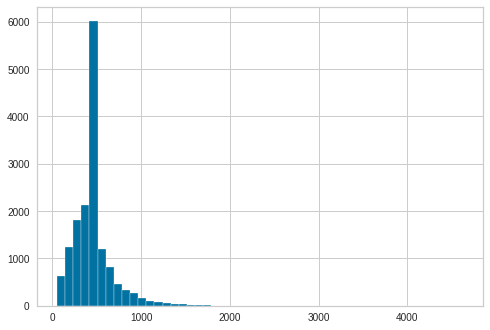

In [113]:
plt.hist([len(t) for t in int_text],50)
plt.show()

In [114]:
print('The number of articles greater than 800 in length is: ', np.sum(np.array([len(t)>800 for t in int_text])))
print('The number of articles less than 50 in length is: ', np.sum(np.array([len(t)<50 for t in int_text])))

The number of articles greater than 800 in length is:  1109
The number of articles less than 50 in length is:  0


You cannot pass differing lengths of sentences to the algorithm. Hence we shall prepad the sentence with `<PAD>`. Sequences less than 800 in length will be prepadded and sequences that are longer than 800 will be truncated. It is assumed that the detection of fake news can be asserted from the first 800 words.

In [115]:
num2word[len(word2num)] = '<PAD>'
word2num['<PAD>'] = len(word2num)

for i, t in enumerate(int_text):
    if len(t)<800:
        int_text[i] = [word2num['<PAD>']]*(800-len(t)) + t
    elif len(t)>800:
        int_text[i] = t[:800]
    else:
        continue

In [116]:
X = np.array(int_text)
y = data['is_fake']

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [117]:
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10316, 800) (10316,)
(5150, 800) (5150,)


## Many to One LSTM

### Basic Method:

In [118]:
embed_lstm = Sequential()
embed_lstm.add(Embedding(len(word2num), 50)) # , batch_size=batch_size
embed_lstm.add(LSTM(64))
embed_lstm.add(Dense(1, activation='sigmoid'))

embed_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
embed_lstm.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          2718700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,748,205
Trainable params: 2,748,205
Non-trainable params: 0
_________________________________________________________________


In [119]:
# batch_size = 128
# epochs = 5

# history_embed_lstm = embed_lstm.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test), 
#                                     verbose= 1)

In [120]:
# # Save model and history with pickle

# with open("embed_lstm_model.pckl", "wb") as f:
#     pickle.dump(embed_lstm, f)

# with open("embed_lstm_history.pckl", "wb") as f:
#     pickle.dump(history_embed_lstm, f)

In [121]:
## Load models and results with pickle

with open("embed_lstm_model.pckl", "rb") as f:
    embed_lstm = pickle.load(f)

with open("embed_lstm_history.pckl", "rb") as f:
    history_embed_lstm = pickle.load(f)

Instructions for updating:
Use tf.cast instead.


In [122]:
loss, accuracy = embed_lstm.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.8421


In [123]:
print('Accuracy Score', accuracy_score(y_test, embed_lstm.predict_classes(X_test)))
print('roc_auc Score', roc_auc_score(y_test, embed_lstm.predict(X_test)))

Accuracy Score 0.8170873786407767
roc_auc Score 0.8932789895371854


In [124]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

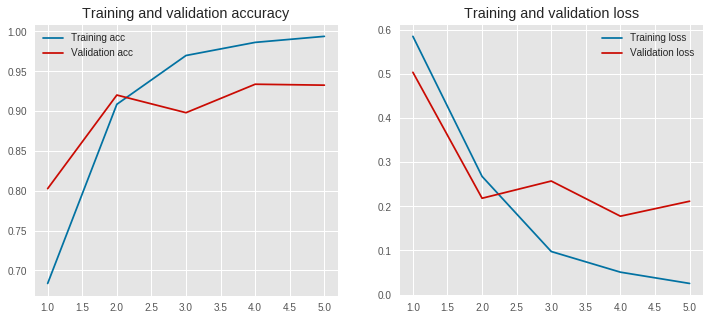

In [125]:
plot_history(history_embed_lstm)

In [226]:
sentence = "North korea is testing out missiles on americans living overseas .".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.00131672]], dtype=float32)

In [227]:
sentence = "The chemicals in the water is turning the freaking frogs gay says cnn . ".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.00490881]], dtype=float32)

In [228]:
sentence = "Lee Hsien Loong is the greatest Prime Minister of all time period.".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.05520804]], dtype=float32)

In [229]:
sentence = "President Trump is the greatest president of all time period .".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.04810721]], dtype=float32)

In [230]:
sentence = "added noted 2018 2019 bloomberg investigations year".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.00032336]], dtype=float32)

In [231]:
sentence = "advertisement says read program government country percent".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.9935788]], dtype=float32)

In [232]:
sentence = "A news article from Bloomberg added that based on an investigation conducted in year 2018, all prof should be jailed".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.00407408]], dtype=float32)

In [233]:
sentence = "Lee Hsien Loong added in 2018 that the reason he was stepping down soon was because he wanted to focus his time \
            to be the best Pokemon Master, like no one ever was."
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.08960647]], dtype=float32)

In [234]:
sentence = "added noted 2018 2019 bloomberg investigations year cent programme prof reuters jailed understands republic dec mr"

sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.00042341]], dtype=float32)

In [235]:
sentence = "In 2017, Lee Hsien Loong said he would be stepping down as Prime Minister as he wanted to focus his time \
            to be the best Pokemon Master, like no one ever was."

sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.38209122]], dtype=float32)

In [236]:
sentence = "In 2018, Lee Hsien Loong added that he would be stepping down as Prime Minister as he wanted to focus his time \
            to be the best Pokemon Master, like no one ever was."

sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
embed_lstm.predict(sentence_num[None,:])

array([[0.12814358]], dtype=float32)

### Method 2: Fixed Embeddings
This is where we use the `Embedding2` class to which we give a set of weights which remain the same through training. Note especially the number of trainable parameters in the summary.

In [135]:
glove_lstm = Sequential()
glove_lstm.add(Embedding2(len(word2num), 50,
                    fixed_weights=np.array([word2glove[w] for w in words_in_glove]))) # , batch_size=batch_size
glove_lstm.add(LSTM(64))
glove_lstm.add(Dense(1, activation='sigmoid'))

# rmsprop = keras.optimizers.RMSprop(lr=1e-4)

glove_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
glove_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding2_1 (Embedding2)    (None, None, 50)          2718700   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,748,205
Trainable params: 217,155
Non-trainable params: 2,531,050
_________________________________________________________________


In [136]:
batch_size = 128

history_glove_lstm = glove_lstm.fit(X_train, y_train, batch_size=batch_size, epochs=15, validation_data=(X_test, y_test), 
                                    verbose= 1)

Train on 10316 samples, validate on 5150 samples
Epoch 1/15
10316/10316 [==============================] - 105s 10ms/step - loss: 0.6301 - acc: 0.6483 - val_loss: 0.5604 - val_acc: 0.7039
Epoch 2/15
10316/10316 [==============================] - 105s 10ms/step - loss: 0.5928 - acc: 0.6975 - val_loss: 0.5543 - val_acc: 0.7272
Epoch 3/15
10316/10316 [==============================] - 104s 10ms/step - loss: 0.4927 - acc: 0.7625 - val_loss: 0.4539 - val_acc: 0.7909
Epoch 4/15
10316/10316 [==============================] - 105s 10ms/step - loss: 0.5338 - acc: 0.7390 - val_loss: 0.4028 - val_acc: 0.8431
Epoch 5/15
10316/10316 [==============================] - 104s 10ms/step - loss: 0.3336 - acc: 0.8607 - val_loss: 0.3412 - val_acc: 0.8348
Epoch 6/15
10316/10316 [==============================] - 105s 10ms/step - loss: 0.2883 - acc: 0.8742 - val_loss: 0.2828 - val_acc: 0.8788
Epoch 7/15
10316/10316 [==============================] - 105s 10ms/step - loss: 0.2496 - acc: 0.8939 - val_loss: 0.2

In [137]:
# # Save model and history with pickle

# with open("glove_lstm_model.pckl", "wb") as f:
#     pickle.dump(glove_lstm, f)

# with open("glove_lstm_history.pckl", "wb") as f:
#     pickle.dump(history_glove_lstm, f)

In [138]:
# ## Load models and results with pickle

# with open("glove_lstm_model.pckl", "rb") as f:
#     glove_lstm = pickle.load(f)

# # with open("glove_lstm_history.pckl", "rb") as f:
# #     history_glove_lstm = pickle.load(f)

In [139]:
# # serialize model to JSON
# model_json = glove_lstm.to_json()
# with open("glove_lstm.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# glove_lstm.save_weights("glove_lstm_weights.h5")
# print("Saved model to disk")
 
# # later...
 
# # load json and create model
# json_file = open('glove_lstm.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# # loaded_model = model_from_json(loaded_model_json)
# # # load weights into new model
# # loaded_model.load_weights("glove_lstm_weights.h5")
# # print("Loaded model from disk")

Saved model to disk


In [240]:
loss, accuracy = glove_lstm.evaluate(X_train, y_train, verbose=False)
train_score = accuracy
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9185


In [241]:
accuracy_test_score = accuracy_score(y_test, glove_lstm.predict_classes(X_test))
auc_test_score = roc_auc_score(y_test, glove_lstm.predict(X_test))

print('Accuracy Score', accuracy_score(y_test, glove_lstm.predict_classes(X_test)))
print('roc_auc Score', roc_auc_score(y_test, glove_lstm.predict(X_test)))

Accuracy Score 0.8928155339805826
roc_auc Score 0.9740295975115468


In [142]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

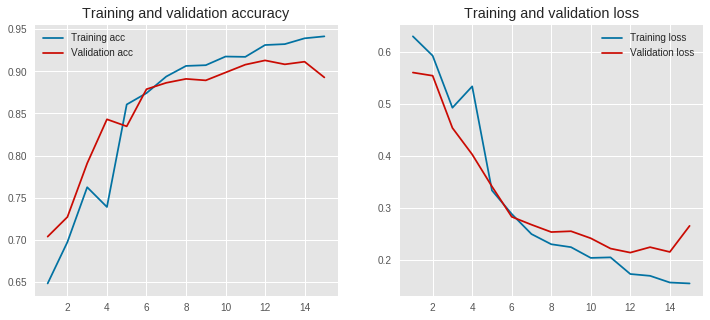

In [143]:
plot_history(history_glove_lstm)

In [277]:
models_results_df.loc[[40,101], :]

,train_scores,model_name,train_score_mean,accuracy_score,auc_score
40,0.943798,LinearSVM_tfidf,0.922355,0.944272,0.986156
101,0.918476,LSTM_GloVe,0.918476,0.892816,0.97403


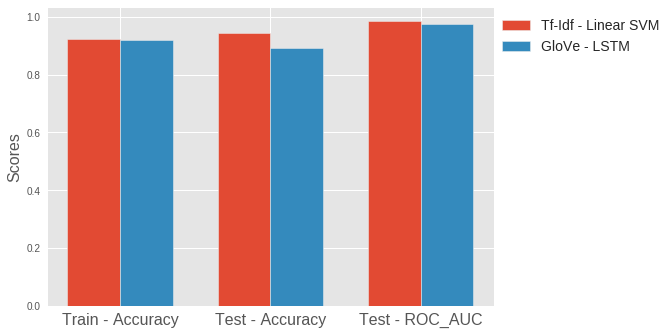

In [328]:
N = 3
svm_scores = tuple(models_results_df.loc[40, :])[-3:]

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, svm_scores, width, bottom=0)


lstm_scores = tuple(models_results_df.loc[101, :])[-3:]
p2 = ax.bar(ind + width, lstm_scores, width, bottom=0)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Train - Accuracy', 'Test - Accuracy', 'Test - ROC_AUC'), fontsize = 16)
plt.ylabel('Scores', fontsize = 16)

ax.legend((p1[0], p2[0]), ('Tf-Idf - Linear SVM', 'GloVe - LSTM'), fontsize= 14, bbox_to_anchor=(1.4,0.8), loc="lower right")
ax.autoscale_view()

plt.show()

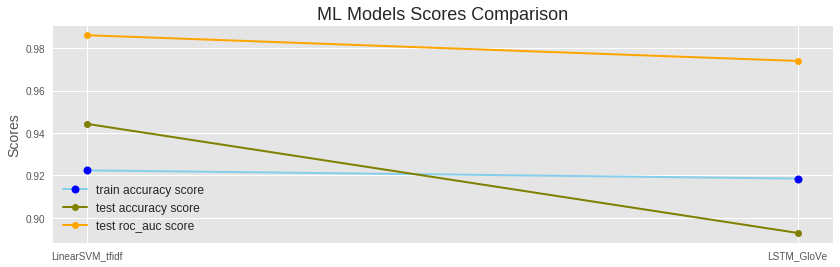

In [275]:
lstm_result_df = pd.DataFrame([train_score, 'LSTM_GloVe', train_score, accuracy_test_score, auc_test_score]).T
lstm_result_df.columns = ['train_scores', 'model_name', 'train_score_mean', 'accuracy_score', 'auc_score']
models_results_df = pd.concat([models_results_df, lstm_result_df], axis= 0)
models_results_df.reset_index(drop= True, inplace= True)

fig = plt.figure(figsize=(14,4))

plt.plot('model_name', 'train_score_mean', data= models_results_df.loc[[40,101], :], marker='o', markerfacecolor='blue', 
         markersize=8, color='skyblue', linewidth=2, label = 'train accuracy score')
plt.plot('model_name', 'accuracy_score', data= models_results_df.loc[[40,101], :], marker= 'o', color='olive', 
         linewidth=2, label = 'test accuracy score')
plt.plot('model_name', 'auc_score', data= models_results_df.loc[[40,101], :], marker='o', color='orange', linewidth=2, 
         label="test roc_auc score")

plt.title('ML Models Scores Comparison', fontsize = 18)

plt.ylabel('Scores', fontsize= 14)

plt.legend(fontsize = 12)

plt.show()

In [144]:
sentence = "North korea is testing out missiles on americans living overseas .".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.43506905]], dtype=float32)

In [145]:
sentence = "The chemicals in the water is turning the freaking frogs gay says cnn . ".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.7972448]], dtype=float32)

In [157]:
sentence = "Lee Hsien Loong is the greatest Prime Minister of all time period.".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.9419358]], dtype=float32)

In [146]:
sentence = "President Trump is the greatest president of all time period .".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.3988751]], dtype=float32)

In [155]:
sentence = "added noted 2018 2019 bloomberg investigations year".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.83096194]], dtype=float32)

In [156]:
sentence = "advertisement says read program government country percent".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.8786677]], dtype=float32)

In [149]:
sentence = "A news article from Bloomberg added that based on an investigation conducted in year 2018, all prof should be jailed".lower()
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.99907196]], dtype=float32)

In [150]:
sentence = "Lee Hsien Loong added in 2018 that the reason he was stepping down soon was because he wanted to focus his time \
            to be the best Pokemon Master, like no one ever was."
sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.9963684]], dtype=float32)

In [151]:
sentence = "added noted 2018 2019 bloomberg investigations year cent programme prof reuters jailed understands republic dec mr"

sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.7398947]], dtype=float32)

In [158]:
sentence = "In 2017, Lee Hsien Loong said he would be stepping down as Prime Minister as he wanted to focus his time \
            to be the best Pokemon Master, like no one ever was."

sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.9970125]], dtype=float32)

In [159]:
sentence = "In 2018, Lee Hsien Loong added that he would be stepping down as Prime Minister as he wanted to focus his time \
            to be the best Pokemon Master, like no one ever was."

sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)
glove_lstm.predict(sentence_num[None,:])

array([[0.9971046]], dtype=float32)

In [152]:
sentence = "singapore two men who had sex with a then 13yearold secondary school student after chatting her up on mobile applications like wechat and meow chat were sentenced to jail on monday july 2 . abdul rashid sapuan 26 who was a police national serviceman attached to the special operations command was sentenced to 15 months while rosidi ayop jr flora a 21yearold filipino permanent resident who worked as a bellboy was sentenced to 13 months . rosidi who is currently serving his national service got the lighter sentence as he was under 21 years old when he committed the offence . court documents stated that the girl now a 14yearold who cannot be named due to a gag order has an iq score of 87 which suggested that she was functioning within the low average range of intelligence . the victims mother a 44yearold receptionist lodged a police report on oct 10 2016 after discovering sexuallycharged conversations between her daughter and unknown men on the girls mobile phone . in those conversations naked photographs were exchanged . the girl also asked if she could be the mens girlfriend before arranging to meet them at her house so that they can have sex while her mother was at work . the girl first had sex with rashid after getting acquainted with him sometime in late september 2016 through wechat . the victim asked him via whatsapp on sept 24 2016 if she could be his girlfriend before asking him if he wanted to have sex with her . rashid agreed about the sex but told her to wait until she finished her o level examinations before they talk about getting into a relationship . more than a week later on oct 7 2016 the girl had sex with rosidi an acquaintance he met through meow chat in february that year . among the two men other charges including procuring the commission of an indecent act by a child by asking her to send him a nude photograph as well as touching the minor inappropriately were taken into consideration during their sentencing . for sexually penetrating a minor who is under 14 years old with or without her consent the men could have been sentenced to a jail term of up to 20 years and could also be liable to a fine or to caning . today understands there is a third man who has been charged with having sex with the same victim . his case will be heard in court on july 23 ."

sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)

glove_lstm.predict(sentence_num[None,:])

array([[0.88647664]], dtype=float32)

In [153]:
sentence = """
SINGAPORE - Travel agency Chan Brothers Travel is being investigated by Singapore's privacy watchdog after the personal data of more than 500 of its customers was found to be publicly accessible.
Screenshots provided by a tip-off seen by The Straits Times showed that the website exposed data such as names, NRIC numbers, passport numbers and even travel plans of Chan Brothers Travel's customers.
The Personal Data Protection Commission (PDPC) said on Friday (May 24) that it has been notified of the incident and is investigating.
Responding to ST queries, a spokesman for the travel agency said that it takes full responsibility for the incident and that it was notified of the vulnerabilities on Thursday.
It is currently working with its vendor, Aodigy Asia Pacific, to ascertain the cause of the data exposure.
"Upon notification of the vulnerabilities, we immediately took action to address the matter including containing the extent of vulnerabilities, assessing the extent of impact and reporting the incident to PDPC," the spokesman said.
"Some of the measures undertaken require continual monitoring, review and action, as it involves information that has been publicly cached. We have shut down the site meanwhile."
When ST visited the website on Friday, some of the data could still be publicly accessed via cached versions of the site, which are temporarily available versions of websites.
When asked if Chan Brothers Travel had informed any of the affected customers, the spokesman said it was progressively contacting affected customers.
"We are currently investigating this matter and ascertaining the extent and nature of information that was revealed. We would like to assure our customers that no sensitive financial and booking information was revealed," she said.
"That said, we recognise that no personal data should be exposed at all in any manner and that it is our responsibility and priority to protect our customers' personal data."
Co-founder of local fintech start-up Factors Platform Andrew Goh informed ST of the insecure data. He had come across it as he was in the midst of gathering datasets for his work.
He discovered that he could look up client inquiries and post-tour surveys on the Chan Brothers Travel site, which contained the personal information.
Said Mr Goh: "I have found close to 500 entries in aggregate (inquiries and surveys), close to 450 of them are unique clients."
He said he had found the data on Wednesday evening and decided to go down to the travel agency's office the next day to notify them about the issue.
There, he met its IT director, who, he said, told him that the issue would be sorted out.
Later on Thursday, Mr Goh said a Chan Brothers Travel staff member called him to inform him that the problem has been fixed.
The staff member also asked him if he wanted to book a tour with them. Mr Goh said no.
But when Mr Goh checked again in the evening, the data was still publicly accessible.
"To my horror, all the data could still be found. I find it very appalling that the company does not seem to place customer's privacy at heart and kind of treated it like a joke by trying to sell me tour packages," he said.
"""

sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)

glove_lstm.predict(sentence_num[None,:])

array([[0.9932807]], dtype=float32)

In [154]:
sentence = """
SINGAPORE - A day before he was scheduled to hang on Friday (May 24), a Malaysian drug mule on death row got a temporary reprieve after the Court of Appeal granted him a stay of execution.

Pannir Selvam Pranthaman, 31, applied for his death sentence to be stayed on the basis that he intends to mount a legal challenge against the rejection of his petition for clemency to President Halimah Yacob.

On Thursday (May 23), a three-judge Court of Appeal granted his request, noting that Pannir Selvam was told of the rejection and his execution date just one week in advance.

This did not leave the prisoner much time to obtain legal advice on what options he has to challenge the rejection of his clemency plea, said Chief Justice Sundaresh Menon.

He added that Pannir Selvam's Singapore lawyers, Mr Too Xing Ji and Mr Lee Ji En, who were instructed only on Thursday, could not be expected to mount a fully developed argument in such a time frame.

CJ Menon said: "There are extremely narrow grounds upon which the clemency process may be so impugned. However, in our judgment, the applicant ought to have a reasonable opportunity to take advice on whether he can mount a successful challenge."

During the hearing, Mr Too raised questions about the "lack of transparency" of the clemency process in relation to Pannir Selvam, who was convicted of importing 51.84g of heroin in 2017.

The court heard that two letters sent to his family - one from the Istana rejecting the clemency petition and the other from the Singapore Prison Service stating his execution date - were both dated May 17.

In an affidavit, Pannir Selvam said his family had courier receipts to show that the letters were posted out on May 16.

He took issue with the sequence of events, arguing that he had been deprived of a fair clemency process.

In response, the prosecution, represented by Senior Counsel Francis Ng, submitted affidavits from the Istana, the Attorney-General's Chambers and the prisons, to set out the sequence of events.
Mr Benny Lee, principal private secretary to the President, said in his affidavit that prior to May 7, Madam Halimah had been advised by the Cabinet that the law should be allowed to take its course in Pannir Selvam's case.

On May 7, Mr Lee signed letters informing Pannir Selvam and his family that the death sentence would stand. These letters were sent to the prisons on May 14, to be forwarded to the prisoner and his family.
In a statement addressing Malaysian media reports about the case, the Ministry of Home Affairs (MHA) said the petitions were carefully considered.

The President acted on the advice of the Cabinet, in accordance with the Constitution, in not exercising the clemency power, said the statement on Thursday.

The ministry also clarified reports claiming that Pannir Selvam was unreasonably denied a certificate of substantive assistance, which might have spared him the mandatory death penalty.

"MHA would like to clarify that the decision is taken by the Public Prosecutor in his sole discretion, based on whether the offender had provided the authorities substantive assistance that leads to the disruption of drug trafficking activities in Singapore. The Public Prosecutor determined that he had not," it added.

This issue was not pursued in court by Mr Too, who focused on the clemency process.

He argued that it was still not clear when the decision was made, why the letters were post-dated, and why the decision had not been communicated earlier to his client's family.

He said his client was deprived of the time to consult a lawyer to see if there were any grounds to file a judicial review against the rejection of his clemency petition.
"""

sentence_num = [word2num[w] if w in word2num else word2num['<Other>'] for w in sentence.split()]
sentence_num = [word2num['<PAD>']]*(800-len(sentence_num)) + sentence_num
sentence_num = np.array(sentence_num)

glove_lstm.predict(sentence_num[None,:])

array([[0.00840222]], dtype=float32)

# Visualise Misclass Category

In [176]:
# index_test = list(X_test.index)
# test_df = data.loc[index_test, :]
test_df['predict'] = list(glove_lstm.predict_classes(X_test))

In [177]:
predict_correct = []
for index in list(test_df.index):
    if test_df.loc[index, 'is_fake'] == test_df.loc[index, 'predict']:
        predict_correct.append(1)
    else:
        predict_correct.append(0)

test_df['predict_correct'] = predict_correct
test_df['predict_wrong'] = [1 if i == 0 else 0 for i in test_df['predict_correct']]

In [178]:
category_misclass = test_df.groupby(['category']).sum().reset_index()[['category', 'predict_correct', 'predict_wrong']]
category_misclass['total_count'] = category_misclass['predict_correct'] + category_misclass['predict_wrong']
category_misclass['predict_correct'] = category_misclass['predict_correct'] / category_misclass['total_count']
category_misclass['predict_wrong'] = category_misclass['predict_wrong'] / category_misclass['total_count']

In [179]:
category_misclass.head()

,category,predict_correct,predict_wrong,total_count
0,business,0.881126,0.118874,1918
1,courts-crime,0.913761,0.086239,1090
2,education,0.914062,0.085938,256
3,environment,0.871622,0.128378,148
4,health,0.895062,0.104938,324


In [202]:
category_misclass = category_misclass[['category', 'predict_correct', 'predict_wrong']]
category_misclass

,category,predict_correct,predict_wrong
0,business,0.881126,0.118874
1,courts-crime,0.913761,0.086239
2,education,0.914062,0.085938
3,environment,0.871622,0.128378
4,health,0.895062,0.104938
5,housing,0.967742,0.032258
6,manpower,0.892857,0.107143
7,politics,0.914508,0.085492
8,transport,0.842742,0.157258


<Figure size 1080x720 with 0 Axes>

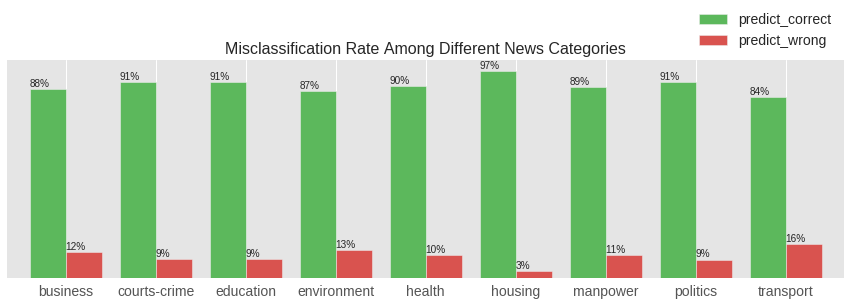

In [201]:
colors_list = ['#5cb85c','#d9534f']

plt.figure(figsize= (15,10))

# Change this line to plot percentages instead of absolute values
ax = category_misclass.plot(kind='bar',figsize=(15,4), width = 0.8, color = colors_list, edgecolor=None)

plt.legend(labels= ['predict_correct', 'predict_wrong'], fontsize= 14, bbox_to_anchor=(1,1), loc="lower right")
plt.title("Misclassification Rate Among Different News Categories", fontsize= 16)

plt.xticks(np.arange(len(category_misclass['category'])), category_misclass['category'], fontsize=14, 
           rotation='horizontal')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
plt.show()

# Visualisation on Class Prediction Error

In [190]:
isfake_misclass = test_df.groupby(['is_fake']).sum().reset_index()[['is_fake', 'predict_correct', 'predict_wrong']]
isfake_misclass['total_count'] = isfake_misclass['predict_correct'] + isfake_misclass['predict_wrong']
isfake_misclass['predict_correct'] = isfake_misclass['predict_correct'] / isfake_misclass['total_count']
isfake_misclass['predict_wrong'] = isfake_misclass['predict_wrong'] / isfake_misclass['total_count']

In [192]:
isfake_misclass.head()

,is_fake,predict_correct,predict_wrong,total_count
0,0,0.810874,0.189126,2575
1,1,0.974757,0.025243,2575


In [217]:
isfake_misclass = isfake_misclass[['is_fake', 'predict_correct', 'predict_wrong']]
isfake_misclass['is_fake'] = ['Real News', 'Fake News']
isfake_misclass

,is_fake,predict_correct,predict_wrong
0,Real News,0.810874,0.189126
1,Fake News,0.974757,0.025243


<Figure size 576x396 with 0 Axes>

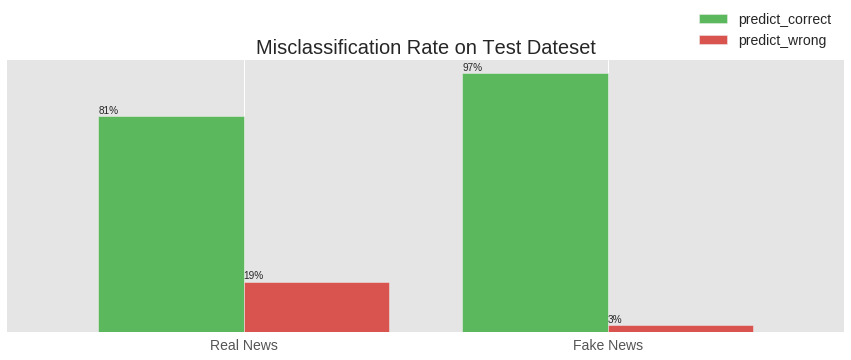

In [225]:
colors_list = ['#5cb85c','#d9534f']

plt.figure()

# Change this line to plot percentages instead of absolute values
ax = isfake_misclass.plot(kind='bar',figsize=(15,5), width = 0.8, color = colors_list, edgecolor=None)

plt.legend(labels= ['predict_correct', 'predict_wrong'], fontsize= 14, bbox_to_anchor=(1,1), loc="lower right")
plt.title("Misclassification Rate on Test Dateset", fontsize= 20)

plt.xticks(np.arange(len(isfake_misclass['is_fake'])), isfake_misclass['is_fake'], fontsize=14, 
           rotation='horizontal')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
    
plt.show()